## 1. 대학 데이터셋을 사용해 소수 인종이 다수인 주 찾기

In [1]:
import pandas as pd
import numpy as np

In [2]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college.head()

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                  
Alabama A & M University                 Normal     AL   1.0      0.0   
University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
Amridge University                   Montgomery     AL   0.0      0.0   
University of Alabama in Huntsville  Huntsville     AL   0.0      0.0   
Alabama State University             Montgomery     AL   1.0      0.0   

                                     WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                         
Alabama A & M University                   0.0         0     424.0     420.0   
University of Alabama at Birmingham        0.0         0     570.0     565.0   
Amridge University                         0.0         1       NaN       NaN   
University of Alabama in Huntsville        0.0         0     595.0     590.0   
Alabama State University                   0.0         0     425.0     430.0   

                                     DISTANCEONLY     UGDS  \
INSTNM                                                       
Alabama A & M University                      0.0   4206.0   
University of Alabama at Birmingham           0.0  11383.0   
Amridge University                            1.0    291.0   
University of Alabama in Huntsville           0.0   5451.0   
Alabama State University                      0.0   4811.0   

                                            ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                      ...                                
Alabama A & M University                    ...             0.0000    0.0059   
University of Alabama at Birmingham         ...             0.0368    0.0179   
Amridge University                          ...             0.0000    0.0000   
University of Alabama in Huntsville         ...             0.0172    0.0332   
Alabama State University                    ...             0.0098    0.0243   

                                     UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                        
Alabama A & M University                0.0138    0.0656         1   0.7356   
University of Alabama at Birmingham     0.0100    0.2607         1   0.3460   
Amridge University                      0.2715    0.4536         1   0.6801   
University of Alabama in Huntsville     0.0350    0.2146         1   0.3072   
Alabama State University                0.0137    0.0892         1   0.7347   

                                     PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                    
Alabama A & M University               0.8284   0.1049            30300   
University of Alabama at Birmingham    0.5214   0.2422            39700   
Amridge University                     0.7795   0.8540            40100   
University of Alabama in Huntsville    0.4596   0.2640            45500   
Alabama State University               0.7554   0.1270            26600   

                                     GRAD_DEBT_MDN_SUPP  
INSTNM                                                   
Alabama A & M University                          33888  
University of Alabama at Birmingham             21941.5  
Amridge University                                23370  
University of Alabama in Huntsville               24097  
Alabama State University                        33118.5  

[5 rows x 26 columns]

In [3]:
grouped = college.groupby('STABBR')

In [4]:
def check_m(df, threshold):
    m_pct = 1 - df['UGDS_WHITE']
    total_m = (df['UGDS'] * m_pct).sum()
    total_ugds = df['UGDS'].sum()
    total_m_pct = total_m / total_ugds
    return total_m_pct > threshold

In [5]:
c_filter = grouped.filter(check_m, threshold=0.5)
c_filter.head()

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                    
Everest College-Phoenix                   Phoenix     AZ   0.0      0.0   
Collins College                           Phoenix     AZ   0.0      0.0   
Empire Beauty School-Paradise Valley      Phoenix     AZ   0.0      0.0   
Empire Beauty School-Tucson                Tucson     AZ   0.0      0.0   
Thunderbird School of Global Management  Glendale     AZ   0.0      0.0   

                                         WOMENONLY  RELAFFIL  SATVRMID  \
INSTNM                                                                   
Everest College-Phoenix                        0.0         1       NaN   
Collins College                                0.0         0       NaN   
Empire Beauty School-Paradise Valley           0.0         1       NaN   
Empire Beauty School-Tucson                    0.0         0       NaN   
Thunderbird School of Global Management        0.0         0       NaN   

                                         SATMTMID  DISTANCEONLY    UGDS  \
INSTNM                                                                    
Everest College-Phoenix                       NaN           0.0  4102.0   
Collins College                               NaN           0.0    83.0   
Empire Beauty School-Paradise Valley          NaN           0.0    25.0   
Empire Beauty School-Tucson                   NaN           0.0   126.0   
Thunderbird School of Global Management       NaN           0.0     1.0   

                                                ...          UGDS_2MOR  \
INSTNM                                          ...                      
Everest College-Phoenix                         ...             0.0373   
Collins College                                 ...             0.0241   
Empire Beauty School-Paradise Valley            ...             0.0400   
Empire Beauty School-Tucson                     ...             0.0000   
Thunderbird School of Global Management         ...             0.0000   

                                         UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                   
Everest College-Phoenix                       0.0     0.1026    0.4749   
Collins College                               0.0     0.3855    0.3373   
Empire Beauty School-Paradise Valley          0.0     0.0000    0.1600   
Empire Beauty School-Tucson                   0.0     0.0079    0.2222   
Thunderbird School of Global Management       0.0     0.0000    1.0000   

                                         CURROPER  PCTPELL  PCTFLOAN  UG25ABV  \
INSTNM                                                                          
Everest College-Phoenix                         0   0.8291    0.7151   0.6700   
Collins College                                 0   0.7205    0.8228   0.4764   
Empire Beauty School-Paradise Valley            0   0.6349    0.5873   0.4651   
Empire Beauty School-Tucson                     1   0.7962    0.6615   0.4229   
Thunderbird School of Global Management         0   0.0000    0.0000   0.0000   

                                         MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
INSTNM                                                                        
Everest College-Phoenix                            28600                9500  
Collins College                                    25700               47000  
Empire Beauty School-Paradise Valley               17800                9588  
Empire Beauty School-Tucson                        18200                9833  
Thunderbird School of Global Management           118900   PrivacySuppressed  

[5 rows x 26 columns]

In [6]:
college.shape

(7535, 26)

In [7]:
c_filter.shape

(3028, 26)

In [8]:
c_filter['STABBR'].nunique()

20

## 2. 체중 감량 내기의 승자 찾기

In [9]:
weight_loss = pd.read_csv('data/weight_loss.csv')
weight_loss.query("Month == 'Jan'")

Name Month    Week  Weight
0  Bob   Jan  Week 1     291
1  Amy   Jan  Week 1     197
2  Bob   Jan  Week 2     288
3  Amy   Jan  Week 2     189
4  Bob   Jan  Week 3     283
5  Amy   Jan  Week 3     189
6  Bob   Jan  Week 4     283
7  Amy   Jan  Week 4     190

In [10]:
# 무게감량 구하기
# (현재무게 - 처음무게)/처음무게
def find_perc_loss(s):
    return (s - s.iloc[0]) / s.iloc[0] 

In [11]:
bob_jan = weight_loss.query("Name=='Bob' and Month=='Jan'")
bob_jan.head()

Name Month    Week  Weight
0  Bob   Jan  Week 1     291
2  Bob   Jan  Week 2     288
4  Bob   Jan  Week 3     283
6  Bob   Jan  Week 4     283

In [12]:
bob_jan['Weight'].iloc[0]

291

In [13]:
(bob_jan['Weight'] - bob_jan['Weight'].iloc[0])/bob_jan['Weight'].iloc[0]

0    0.000000
2   -0.010309
4   -0.027491
6   -0.027491
Name: Weight, dtype: float64

In [14]:
find_perc_loss(bob_jan['Weight'])

0    0.000000
2   -0.010309
4   -0.027491
6   -0.027491
Name: Weight, dtype: float64

In [15]:
pcnt_loss = weight_loss.groupby(['Name','Month'])['Weight'].transform(find_perc_loss)
pcnt_loss.head()

0    0.000000
1    0.000000
2   -0.010309
3   -0.040609
4   -0.027491
Name: Weight, dtype: float64

In [16]:
weight_loss['Perc Weight Loss'] = pcnt_loss

In [17]:
weight_loss.head()

Name Month    Week  Weight  Perc Weight Loss
0  Bob   Jan  Week 1     291          0.000000
1  Amy   Jan  Week 1     197          0.000000
2  Bob   Jan  Week 2     288         -0.010309
3  Amy   Jan  Week 2     189         -0.040609
4  Bob   Jan  Week 3     283         -0.027491

In [18]:
weight_loss.query("Name=='Bob' and Month in ['Jan','Feb']")

Name Month    Week  Weight  Perc Weight Loss
0   Bob   Jan  Week 1     291          0.000000
2   Bob   Jan  Week 2     288         -0.010309
4   Bob   Jan  Week 3     283         -0.027491
6   Bob   Jan  Week 4     283         -0.027491
8   Bob   Feb  Week 1     283          0.000000
10  Bob   Feb  Week 2     275         -0.028269
12  Bob   Feb  Week 3     268         -0.053004
14  Bob   Feb  Week 4     268         -0.053004

In [19]:
week4 = weight_loss.query('Week == "Week 4"')
week4

Name Month    Week  Weight  Perc Weight Loss
6   Bob   Jan  Week 4     283         -0.027491
7   Amy   Jan  Week 4     190         -0.035533
14  Bob   Feb  Week 4     268         -0.053004
15  Amy   Feb  Week 4     173         -0.089474
22  Bob   Mar  Week 4     261         -0.026119
23  Amy   Mar  Week 4     170         -0.017341
30  Bob   Apr  Week 4     250         -0.042146
31  Amy   Apr  Week 4     161         -0.052941

In [20]:
winner = week4.pivot(index='Month', columns='Name', values='Perc Weight Loss')
winner

Name        Amy       Bob
Month                    
Apr   -0.052941 -0.042146
Feb   -0.089474 -0.053004
Jan   -0.035533 -0.027491
Mar   -0.017341 -0.026119

In [21]:
# np.where :  조건에 맞는 값을 특정 다른 값으로 변환하기
# np.where(조건, 조건에 맞을 때 값, 조건과 다를 때 값)
x = np.array([5, 4, 3, 2, 1, 0])
np.where(x >= 3, 3, x)

array([3, 3, 3, 2, 1, 0])

In [22]:
winner['Winner'] = np.where(winner['Amy']<winner['Bob'], 'Amy','Bob')

In [23]:
winner['Winner']

Month
Apr    Amy
Feb    Amy
Jan    Amy
Mar    Bob
Name: Winner, dtype: object

In [24]:
winner.style.highlight_min(axis=1)

In [25]:
winner.Winner.value_counts()

Amy    3
Bob    1
Name: Winner, dtype: int64

## 3. 주별 가중 평균 SAT 점수 계산

In [26]:
college.head()

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                  
Alabama A & M University                 Normal     AL   1.0      0.0   
University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
Amridge University                   Montgomery     AL   0.0      0.0   
University of Alabama in Huntsville  Huntsville     AL   0.0      0.0   
Alabama State University             Montgomery     AL   1.0      0.0   

                                     WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                         
Alabama A & M University                   0.0         0     424.0     420.0   
University of Alabama at Birmingham        0.0         0     570.0     565.0   
Amridge University                         0.0         1       NaN       NaN   
University of Alabama in Huntsville        0.0         0     595.0     590.0   
Alabama State University                   0.0         0     425.0     430.0   

                                     DISTANCEONLY     UGDS  \
INSTNM                                                       
Alabama A & M University                      0.0   4206.0   
University of Alabama at Birmingham           0.0  11383.0   
Amridge University                            1.0    291.0   
University of Alabama in Huntsville           0.0   5451.0   
Alabama State University                      0.0   4811.0   

                                            ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                      ...                                
Alabama A & M University                    ...             0.0000    0.0059   
University of Alabama at Birmingham         ...             0.0368    0.0179   
Amridge University                          ...             0.0000    0.0000   
University of Alabama in Huntsville         ...             0.0172    0.0332   
Alabama State University                    ...             0.0098    0.0243   

                                     UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                        
Alabama A & M University                0.0138    0.0656         1   0.7356   
University of Alabama at Birmingham     0.0100    0.2607         1   0.3460   
Amridge University                      0.2715    0.4536         1   0.6801   
University of Alabama in Huntsville     0.0350    0.2146         1   0.3072   
Alabama State University                0.0137    0.0892         1   0.7347   

                                     PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                    
Alabama A & M University               0.8284   0.1049            30300   
University of Alabama at Birmingham    0.5214   0.2422            39700   
Amridge University                     0.7795   0.8540            40100   
University of Alabama in Huntsville    0.4596   0.2640            45500   
Alabama State University               0.7554   0.1270            26600   

                                     GRAD_DEBT_MDN_SUPP  
INSTNM                                                   
Alabama A & M University                          33888  
University of Alabama at Birmingham             21941.5  
Amridge University                                23370  
University of Alabama in Huntsville               24097  
Alabama State University                        33118.5  

[5 rows x 26 columns]

In [27]:
# 아래에서 5개 볼때
college.tail()

CITY STABBR  \
INSTNM                                                                        
SAE Institute of Technology  San Francisco                Emeryville     CA   
Rasmussen College - Overland Park                      Overland Park     KS   
National Personal Training Institute of Cleveland   Highland Heights     OH   
Bay Area Medical Academy - San Jose Satellite L...          San Jose     CA   
Excel Learning Center-San Antonio South                  San Antonio     TX   

                                                    HBCU  MENONLY  WOMENONLY  \
INSTNM                                                                         
SAE Institute of Technology  San Francisco           NaN      NaN        NaN   
Rasmussen College - Overland Park                    NaN      NaN        NaN   
National Personal Training Institute of Cleveland    NaN      NaN        NaN   
Bay Area Medical Academy - San Jose Satellite L...   NaN      NaN        NaN   
Excel Learning Center-San Antonio South              NaN      NaN        NaN   

                                                    RELAFFIL  SATVRMID  \
INSTNM                                                                   
SAE Institute of Technology  San Francisco                 1       NaN   
Rasmussen College - Overland Park                          1       NaN   
National Personal Training Institute of Cleveland          1       NaN   
Bay Area Medical Academy - San Jose Satellite L...         1       NaN   
Excel Learning Center-San Antonio South                    1       NaN   

                                                    SATMTMID  DISTANCEONLY  \
INSTNM                                                                       
SAE Institute of Technology  San Francisco               NaN           NaN   
Rasmussen College - Overland Park                        NaN           NaN   
National Personal Training Institute of Cleveland        NaN           NaN   
Bay Area Medical Academy - San Jose Satellite L...       NaN           NaN   
Excel Learning Center-San Antonio South                  NaN           NaN   

                                                    UGDS         ...          \
INSTNM                                                           ...           
SAE Institute of Technology  San Francisco           NaN         ...           
Rasmussen College - Overland Park                    NaN         ...           
National Personal Training Institute of Cleveland    NaN         ...           
Bay Area Medical Academy - San Jose Satellite L...   NaN         ...           
Excel Learning Center-San Antonio South              NaN         ...           

                                                    UGDS_2MOR  UGDS_NRA  \
INSTNM                                                                    
SAE Institute of Technology  San Francisco                NaN       NaN   
Rasmussen College - Overland Park                         NaN       NaN   
National Personal Training Institute of Cleveland         NaN       NaN   
Bay Area Medical Academy - San Jose Satellite L...        NaN       NaN   
Excel Learning Center-San Antonio South                   NaN       NaN   

                                                    UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                    
SAE Institute of Technology  San Francisco                NaN       NaN   
Rasmussen College - Overland Park                         NaN       NaN   
National Personal Training Institute of Cleveland         NaN       NaN   
Bay Area Medical Academy - San Jose Satellite L...        NaN       NaN   
Excel Learning Center-San Antonio South                   NaN       NaN   

                                                    CURROPER  PCTPELL  \
INSTNM                                                                  
SAE Institute of Technology  San Francisco                 1      NaN   
Rasmussen College - Overland Park                  

In [28]:
subset = ['UGDS', 'SATMTMID']
college2 = college.dropna(subset=subset)

In [29]:
college2.tail()

CITY STABBR  HBCU  \
INSTNM                                                                     
Pennsylvania State University-World Campus  University Park     PA   0.0   
Augusta University                                  Augusta     GA   0.0   
University of North Georgia                       Dahlonega     GA   0.0   
University of Florida-Online                    Gainesville     FL   0.0   
University of North Texas at Dallas                  Dallas     TX   0.0   

                                            MENONLY  WOMENONLY  RELAFFIL  \
INSTNM                                                                     
Pennsylvania State University-World Campus      0.0        0.0         0   
Augusta University                              0.0        0.0         0   
University of North Georgia                     0.0        0.0         0   
University of Florida-Online                    0.0        0.0         0   
University of North Texas at Dallas             0.0        0.0         0   

                                            SATVRMID  SATMTMID  DISTANCEONLY  \
INSTNM                                                                         
Pennsylvania State University-World Campus     510.0     505.0           1.0   
Augusta University                             515.0     515.0           0.0   
University of North Georgia                    515.0     505.0           0.0   
University of Florida-Online                   580.0     585.0           1.0   
University of North Texas at Dallas            430.0     465.0           0.0   

                                               UGDS         ...          \
INSTNM                                                      ...           
Pennsylvania State University-World Campus   5736.0         ...           
Augusta University                           5030.0         ...           
University of North Georgia                 14976.0         ...           
University of Florida-Online                  879.0         ...           
University of North Texas at Dallas          1623.0         ...           

                                            UGDS_2MOR  UGDS_NRA  UGDS_UNKN  \
INSTNM                                                                       
Pennsylvania State University-World Campus     0.0282    0.0115     0.0328   
Augusta University                             0.0527    0.0115     0.0221   
University of North Georgia                    0.0266    0.0142     0.0126   
University of Florida-Online                   0.0023    0.0046     0.0444   
University of North Texas at Dallas            0.0142    0.0129     0.0129   

                                            PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                    
Pennsylvania State University-World Campus    0.6968         1   0.3526   
Augusta University                            0.1944         1   0.4340   
University of North Georgia                   0.2900         1   0.3751   
University of Florida-Online                  0.6155         1      NaN   
University of North Texas at Dallas           0.4060         1   0.4813   

                                            PCTFLOAN  UG25ABV  \
INSTNM                                                          
Pennsylvania State University-World Campus    0.5641   0.7903   
Augusta University                            0.5458   0.2713   
University of North Georgia                   0.4028   0.1623   
University of Florida-Online                     NaN      NaN   
University of North Texas at Dallas           0.4791      NaN   

                                            MD_EARN_WNE_P10  \
INSTNM                                                        
Pennsylvania State University-World Campus            47700   
Augusta University                                      NaN   
University of North Georgia                             NaN   
University of Florida-Online                            Na

In [30]:
college.shape, college2.shape

((7535, 26), (1196, 26))

In [31]:
# UGDS : 학부생 수, SATMTMID : SAT 수학 점수 중앙값
def weight_math_average(df): # 수학평균
    weight_math = df['UGDS'] * df['SATMTMID']
    return int(weight_math.sum() / df['UGDS'].sum())

In [32]:
# STABBR : 대학이 위치한 주(state)명
# apply :  각 열(또는 행)을 반복하여 함수를 적용
college.groupby('STABBR').apply(weight_math_average).head()

STABBR
AK      5
AL    261
AR    301
AS      0
AZ     61
dtype: int64

# 객체 합치기

## 1. concat

### 1.1. Multiple Data Loading

In [33]:
df1 = pd.read_csv('data/stocks_2016.csv')
df1

Symbol  Shares  Low  High
0   AAPL      80   95   110
1   TSLA      50   80   130
2    WMT      40   55    70

In [34]:
df2 = pd.read_csv('data/stocks_2017.csv')
df2

Symbol  Shares  Low  High
0   AAPL      50  120   140
1     GE     100   30    40
2    IBM      87   75    95
3    SLB      20   55    85
4    TXN     500   15    23
5   TSLA     100  100   300

In [35]:
df3 = pd.read_csv('data/stocks_2018.csv')
df3

Symbol  Shares  Low  High
0   AAPL      40  135   170
1   AMZN       8  900  1125
2   TSLA      50  220   400

In [36]:
years = 2016, 2017, 2018
type(years)

tuple

In [37]:
stock_tables = [pd.read_csv('data/stocks_{}.csv'.format(year), index_col='Symbol') for year in years]
stock_tables

[        Shares  Low  High
 Symbol                   
 AAPL        80   95   110
 TSLA        50   80   130
 WMT         40   55    70,         Shares  Low  High
 Symbol                   
 AAPL        50  120   140
 GE         100   30    40
 IBM         87   75    95
 SLB         20   55    85
 TXN        500   15    23
 TSLA       100  100   300,         Shares  Low  High
 Symbol                   
 AAPL        40  135   170
 AMZN         8  900  1125
 TSLA        50  220   400]

In [38]:
s_2016, s_2017, s_2018 = stock_tables
s_2017

Shares  Low  High
Symbol                   
AAPL        50  120   140
GE         100   30    40
IBM         87   75    95
SLB         20   55    85
TXN        500   15    23
TSLA       100  100   300

### 1.2. 수직 병합

In [39]:
pd.concat(stock_tables)

Shares  Low  High
Symbol                   
AAPL        80   95   110
TSLA        50   80   130
WMT         40   55    70
AAPL        50  120   140
GE         100   30    40
IBM         87   75    95
SLB         20   55    85
TXN        500   15    23
TSLA       100  100   300
AAPL        40  135   170
AMZN         8  900  1125
TSLA        50  220   400

In [40]:
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

### 1.3. 수평 병합

In [41]:
pd.concat(stock_tables, axis='columns')

Shares   Low   High  Shares    Low   High  Shares    Low    High
AAPL    80.0  95.0  110.0    50.0  120.0  140.0    40.0  135.0   170.0
AMZN     NaN   NaN    NaN     NaN    NaN    NaN     8.0  900.0  1125.0
GE       NaN   NaN    NaN   100.0   30.0   40.0     NaN    NaN     NaN
IBM      NaN   NaN    NaN    87.0   75.0   95.0     NaN    NaN     NaN
SLB      NaN   NaN    NaN    20.0   55.0   85.0     NaN    NaN     NaN
TSLA    50.0  80.0  130.0   100.0  100.0  300.0    50.0  220.0   400.0
TXN      NaN   NaN    NaN   500.0   15.0   23.0     NaN    NaN     NaN
WMT     40.0  55.0   70.0     NaN    NaN    NaN     NaN    NaN     NaN

In [42]:
# zip 함수는 동일한 갯수의 요소값을 갖는 시퀀스 자료형을 묶어주는 역할
a = [1,2,3,4,5]
b = ['a','b','c','d','e']
 
for x,y in zip (a,b):
  print (x,y)

1 a
2 b
3 c
4 d
5 e


In [43]:
pd.concat(dict(zip(years,stock_tables)), axis='columns')

2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN

## 2. join

In [44]:
# lsuffix : 왼쪽 프레임의 겹치는 열에서 사용할 접미어입니다.
# rsuffix : 오른쪽 프레임의 겹치는 열에서 사용할 접미어입니다.
s_2016.join(s_2017, lsuffix='_2016', rsuffix='_2017')

Shares_2016  Low_2016  High_2016  Shares_2017  Low_2017  High_2017
Symbol                                                                    
AAPL             80        95        110         50.0     120.0      140.0
TSLA             50        80        130        100.0     100.0      300.0
WMT              40        55         70          NaN       NaN        NaN

In [45]:
s_2016.join(s_2017, lsuffix='_2016', rsuffix='_2017', how='outer')

Shares_2016  Low_2016  High_2016  Shares_2017  Low_2017  High_2017
Symbol                                                                    
AAPL           80.0      95.0      110.0         50.0     120.0      140.0
GE              NaN       NaN        NaN        100.0      30.0       40.0
IBM             NaN       NaN        NaN         87.0      75.0       95.0
SLB             NaN       NaN        NaN         20.0      55.0       85.0
TSLA           50.0      80.0      130.0        100.0     100.0      300.0
TXN             NaN       NaN        NaN        500.0      15.0       23.0
WMT            40.0      55.0       70.0          NaN       NaN        NaN

In [46]:
s_2017.add_suffix('_2017')

Shares_2017  Low_2017  High_2017
Symbol                                  
AAPL             50       120        140
GE              100        30         40
IBM              87        75         95
SLB              20        55         85
TXN             500        15         23
TSLA            100       100        300

In [47]:
other = [s_2017.add_suffix('_2017'), s_2018.add_suffix('_2018')]
s_2016.add_suffix('_2016').join(other, how='outer')

Shares_2016  Low_2016  High_2016  Shares_2017  Low_2017  High_2017  \
AAPL         80.0      95.0      110.0         50.0     120.0      140.0   
AMZN          NaN       NaN        NaN          NaN       NaN        NaN   
GE            NaN       NaN        NaN        100.0      30.0       40.0   
IBM           NaN       NaN        NaN         87.0      75.0       95.0   
SLB           NaN       NaN        NaN         20.0      55.0       85.0   
TSLA         50.0      80.0      130.0        100.0     100.0      300.0   
TXN           NaN       NaN        NaN        500.0      15.0       23.0   
WMT          40.0      55.0       70.0          NaN       NaN        NaN   

      Shares_2018  Low_2018  High_2018  
AAPL         40.0     135.0      170.0  
AMZN          8.0     900.0     1125.0  
GE            NaN       NaN        NaN  
IBM           NaN       NaN        NaN  
SLB           NaN       NaN        NaN  
TSLA         50.0     220.0      400.0  
TXN           NaN       NaN        NaN  
WMT           NaN       NaN        NaN

## 3. Merge

In [48]:
s_2016

Shares  Low  High
Symbol                   
AAPL        80   95   110
TSLA        50   80   130
WMT         40   55    70

In [49]:
s_2017

Shares  Low  High
Symbol                   
AAPL        50  120   140
GE         100   30    40
IBM         87   75    95
SLB         20   55    85
TXN        500   15    23
TSLA       100  100   300

In [50]:
s_2016.merge(s_2017, left_index=True, right_index=True)

Shares_x  Low_x  High_x  Shares_y  Low_y  High_y
Symbol                                                  
AAPL          80     95     110        50    120     140
TSLA          50     80     130       100    100     300

In [51]:
step1 = s_2016.merge(s_2017, left_index=True, right_index=True, how='outer', suffixes=('_2016','_2017'))
step1

Shares_2016  Low_2016  High_2016  Shares_2017  Low_2017  High_2017
Symbol                                                                    
AAPL           80.0      95.0      110.0         50.0     120.0      140.0
GE              NaN       NaN        NaN        100.0      30.0       40.0
IBM             NaN       NaN        NaN         87.0      75.0       95.0
SLB             NaN       NaN        NaN         20.0      55.0       85.0
TSLA           50.0      80.0      130.0        100.0     100.0      300.0
TXN             NaN       NaN        NaN        500.0      15.0       23.0
WMT            40.0      55.0       70.0          NaN       NaN        NaN

In [52]:
s_merge = step1.merge(s_2018.add_suffix('_2018'), left_index=True, right_index=True, how='outer')
s_merge

Shares_2016  Low_2016  High_2016  Shares_2017  Low_2017  High_2017  \
Symbol                                                                       
AAPL           80.0      95.0      110.0         50.0     120.0      140.0   
AMZN            NaN       NaN        NaN          NaN       NaN        NaN   
GE              NaN       NaN        NaN        100.0      30.0       40.0   
IBM             NaN       NaN        NaN         87.0      75.0       95.0   
SLB             NaN       NaN        NaN         20.0      55.0       85.0   
TSLA           50.0      80.0      130.0        100.0     100.0      300.0   
TXN             NaN       NaN        NaN        500.0      15.0       23.0   
WMT            40.0      55.0       70.0          NaN       NaN        NaN   

        Shares_2018  Low_2018  High_2018  
Symbol                                    
AAPL           40.0     135.0      170.0  
AMZN            8.0     900.0     1125.0  
GE              NaN       NaN        NaN  
IBM             NaN       NaN        NaN  
SLB             NaN       NaN        NaN  
TSLA           50.0     220.0      400.0  
TXN             NaN       NaN        NaN  
WMT             NaN       NaN        NaN

## 4. 병합의 활용

In [53]:
names = ['prices', 'transactions']
food_tables = [pd.read_csv('data/food_{}.csv'.format(name)) for name in names]
food_prices, food_tr = food_tables

In [54]:
food_prices

item store  price  Date
0    pear     A   0.99  2017
1    pear     B   1.99  2017
2   peach     A   2.99  2017
3   peach     B   3.49  2017
4  banana     A   0.39  2017
5  banana     B   0.49  2017
6   steak     A   5.99  2017
7   steak     B   6.99  2017
8   steak     B   4.99  2015

In [55]:
food_tr

custid     item store  quantity
0       1     pear     A         5
1       1   banana     A        10
2       2    steak     B         3
3       2     pear     B         1
4       2    peach     B         2
5       2    steak     B         1
6       2  coconut     B         4

In [56]:
food_tr.merge(food_prices, on=['item','store'])

custid    item store  quantity  price  Date
0       1    pear     A         5   0.99  2017
1       1  banana     A        10   0.39  2017
2       2   steak     B         3   6.99  2017
3       2   steak     B         3   4.99  2015
4       2   steak     B         1   6.99  2017
5       2   steak     B         1   4.99  2015
6       2    pear     B         1   1.99  2017
7       2   peach     B         2   3.49  2017

In [57]:
food_tr.merge(food_prices.query('Date==2017'), how='left')

custid     item store  quantity  price    Date
0       1     pear     A         5   0.99  2017.0
1       1   banana     A        10   0.39  2017.0
2       2    steak     B         3   6.99  2017.0
3       2     pear     B         1   1.99  2017.0
4       2    peach     B         2   3.49  2017.0
5       2    steak     B         1   6.99  2017.0
6       2  coconut     B         4    NaN     NaN

In [58]:
f_join = food_prices.query('Date==2017').set_index(['item','store'])

In [59]:
food_tr.join(f_join, on=['item','store'])

custid     item store  quantity  price    Date
0       1     pear     A         5   0.99  2017.0
1       1   banana     A        10   0.39  2017.0
2       2    steak     B         3   6.99  2017.0
3       2     pear     B         1   1.99  2017.0
4       2    peach     B         2   3.49  2017.0
5       2    steak     B         1   6.99  2017.0
6       2  coconut     B         4    NaN     NaN

In [75]:
pd.concat([food_tr.set_index(['item','store']), food_prices.set_index(['item','store'])], axis='columns')

Exception: cannot handle a non-unique multi-index!

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

In [76]:
data = pd.read_csv('data/breast_cancer.csv')

**데이터 확인**

In [77]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

- ID는 분석대상이 아님
- 목표변수: Diagnosis
- Unnamed: 32 열은 모두 NULL값이므로 제거가 필요

**필요 없는 변수 제거 및 x, y 분할**

In [79]:
col = data.columns
col

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [80]:
del_col = ['Unnamed: 32', 'id', 'diagnosis']
y = data.diagnosis
x = data.drop(del_col, axis=1)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

**데이터 살펴보기**

양성 : 357
음성 : 212


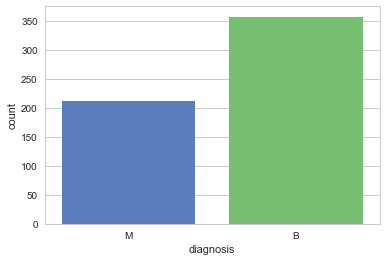

In [84]:
ax = sns.countplot(y, label='count')
B, M = y.value_counts()
print('양성 :', B)
print('음성 :', M)

In [85]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

In [86]:
#!pip install pandas_profiling
import pandas_profiling as pp

In [87]:
pp.ProfileReport(data)

**데이터 시각화-1 : Violinplot**

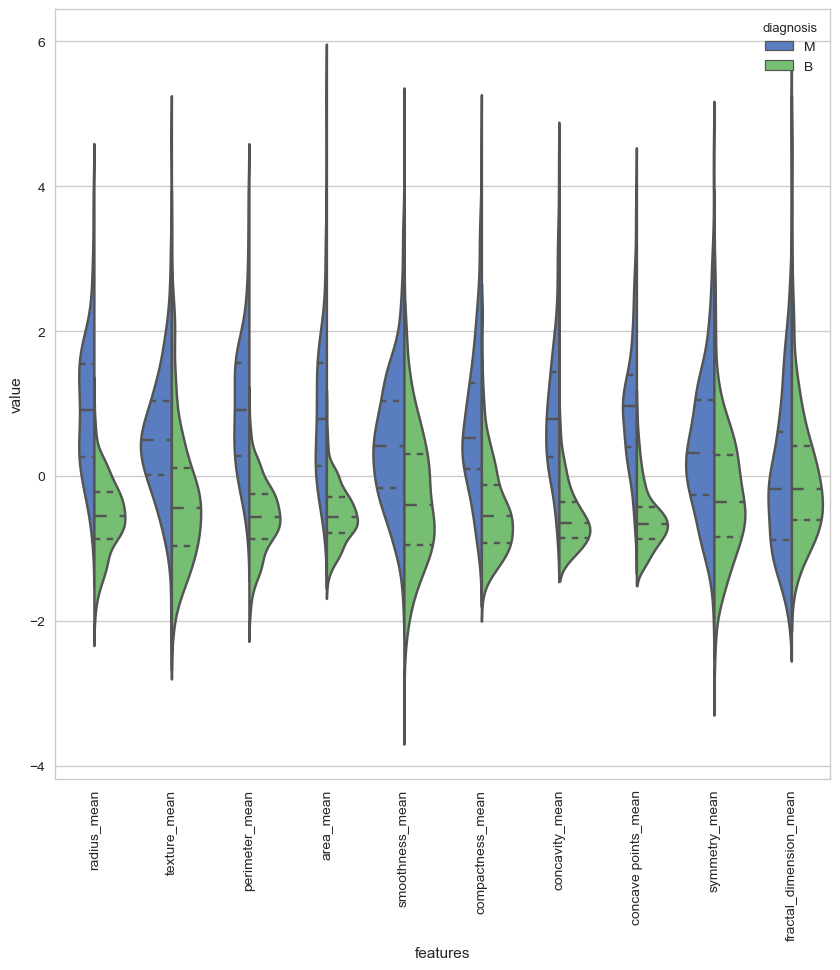

In [88]:
# 확률밀도를 Plotting 하고 중앙의 BoxPlot을 통해 최소값, 25%, 50% 분위, 75% 분위, 최대값
# 을 그려줌으로써 각 데이터 특성을 잘 표현해 준다. 데이터 그룹들 간의 비교를 시각적으로
# 보여준다.
sns.set(style='whitegrid', palette='muted')
graph_data = (x - x.mean()) / (x.std())
graph_data = pd.concat([y, graph_data.iloc[:,0:10]], axis=1)
graph_data = pd.melt(graph_data, id_vars='diagnosis',var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=graph_data, split=True, inner='quart')
plt.xticks(rotation=90);

**데이터 시각화-2 : Box Plot**

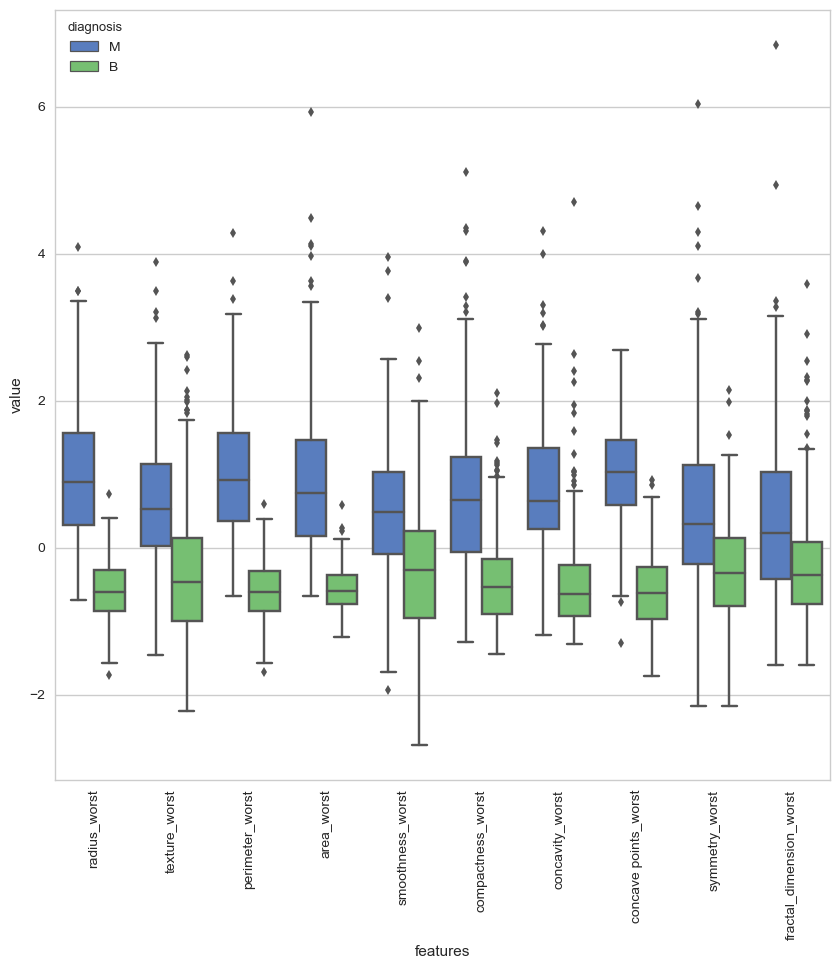

In [89]:
graph_data = (x - x.mean()) / (x.std())
graph_data = pd.concat([y, graph_data.iloc[:,20:31]], axis=1)
graph_data = pd.melt(graph_data, id_vars='diagnosis',var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=graph_data)
plt.xticks(rotation=90);

**데이터 시각화-3 : Swarm Plot**

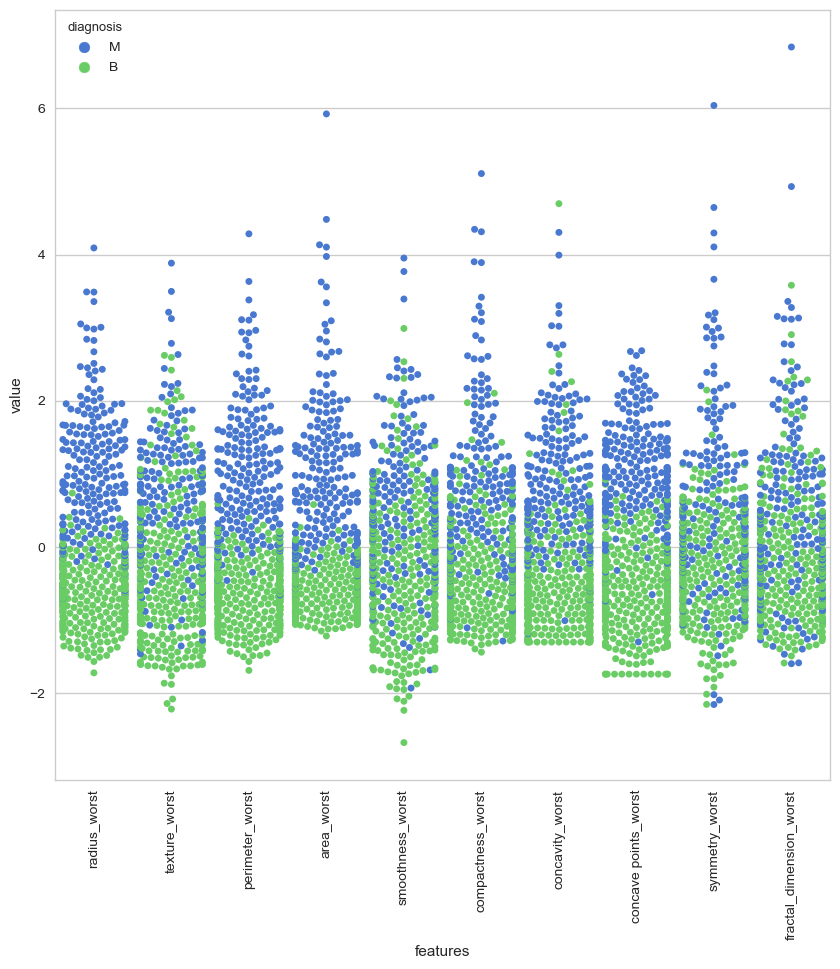

In [90]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=graph_data)
plt.xticks(rotation=90);

**변수간 상관관계 파악 1 - 두변수간 상관 관계**

c:\users\kduar_000\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


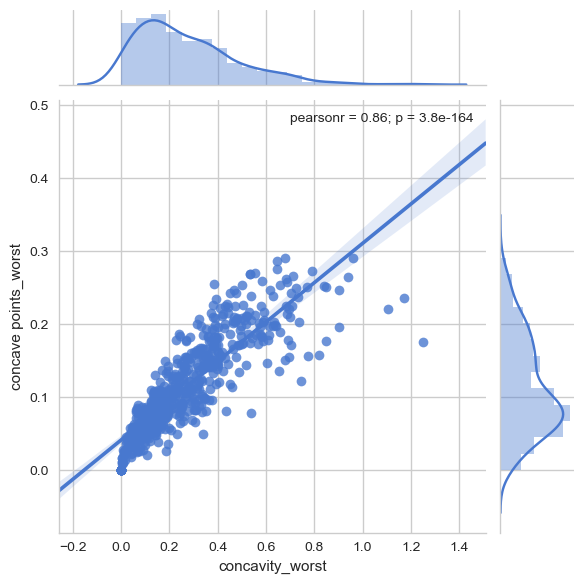

In [91]:
sns.jointplot(x.loc[:, 'concavity_worst'], x.loc[:, 'concave points_worst'], kind='regg');

**변수간 상관관계 파악 2 - 세 변수 이상 상관 관계**

c:\users\kduar_000\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\kduar_000\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


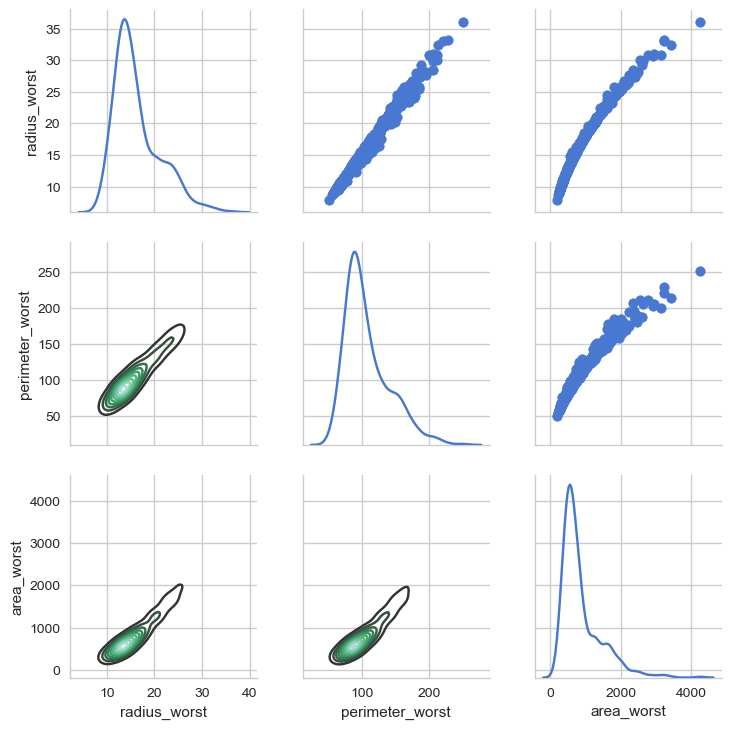

In [92]:
df = x.loc[:, ['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot);

**변수간 상관관계 파악 3 - HeatMap**

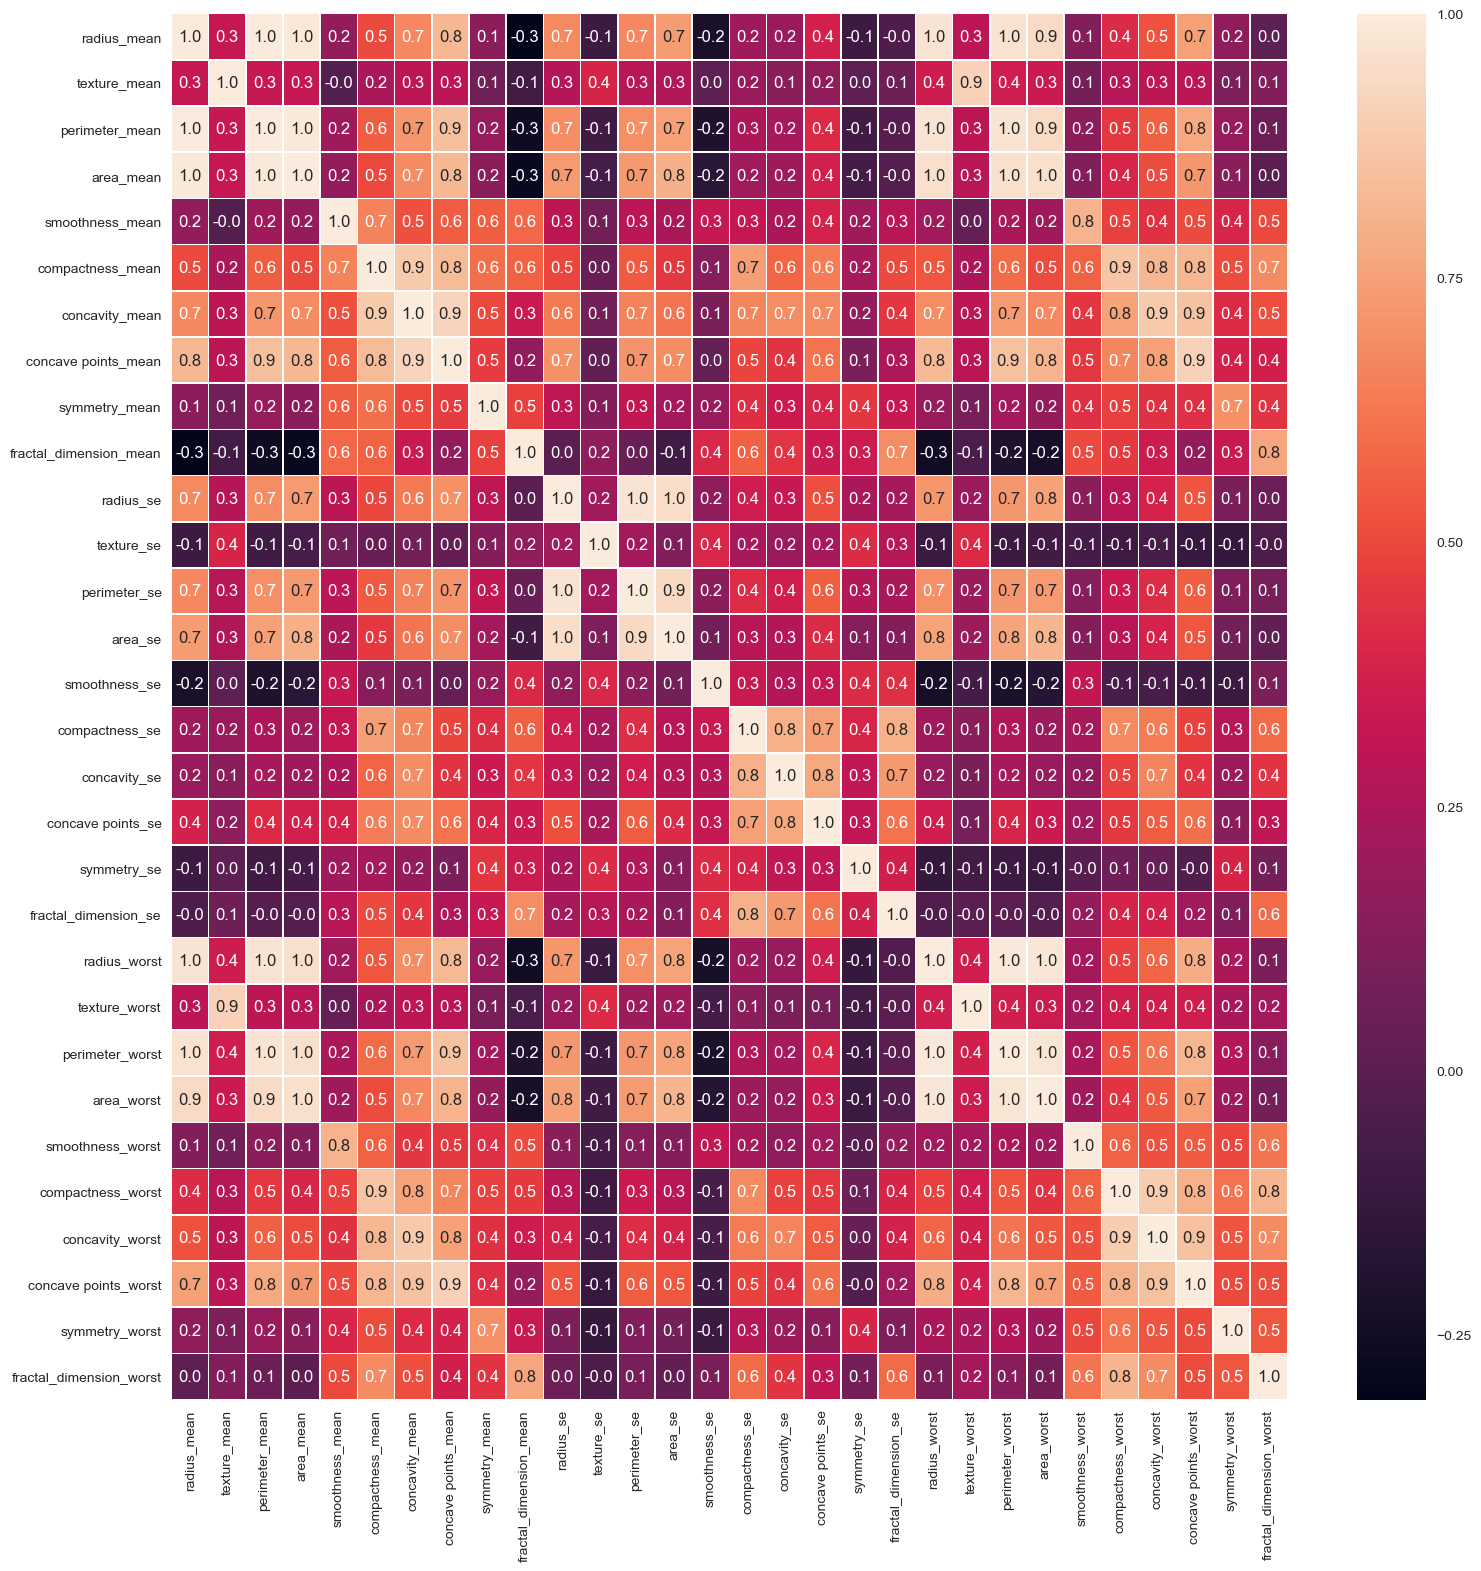

In [93]:
plt.figure(figsize=(18,18))
sns.heatmap(x.corr(), annot=True, linewidth=.5, fmt='.1f');